## 1.下载Wikipedia中文语料库
zhwiki-20190720-pages-articles-multistream.xml.bz2

## 2. 通过WikiExtrctor提取语料库
将提取的语料库存到两个文件中（1000M/document）：wiki_00，wiki_01

## 3. 使用opencc将文件中的繁体字转换为简体字
转换的文件wiki_00.txt，wiki_01.txt

In [5]:
pip install opencc

  Stored in directory: /Users/zhangtingshuo/Library/Caches/pip/wheels/a2/fc/85/880732d25bda4ada0c4b4e505483dcfcac117e70511e9156aa
Successfully built opencc
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import opencc

In [2]:
cc = opencc.OpenCC('t2s')
print(cc.convert('Open Chinese Convert（OpenCC）「開放中文轉換」，是一個致力於中文簡繁轉換的項目，提供高質量詞庫和函數庫(libopencc)。'))

Open Chinese Convert（OpenCC）「开放中文转换」，是一个致力于中文简繁转换的项目，提供高质量词库和函数库(libopencc)。


## 4. 正则剔除语料库无效内容
WikiExtractor提取语料库内容储存到文件中时存在较多空行以及</doc...>和<doc\>，通过正则表达式将这一部分内容剔除<br> 再将处理过后的语料库内容进行jieba分词，对后面word2vec模型训练做准备

In [2]:
import re
import jieba

In [41]:
def parse_wiki(input_path, output_path):
    
    remove_part = '[^<doc>.*]|[^</doc>]' #想要移除的部分的正则表达式
    
    input_wiki = open(input_path, 'r', encoding='utf-8')
    
    article = ''
    
    times = 0
    
    with open(output_path, 'w') as o:
        
        for line in input_wiki.readlines():
            
            line = line.strip('\n') # 读取文件时每行会有看不到的\n,去除这部分
            
            if line=='': continue # 如果是空行，continue循环
                
            match_result = re.match(remove_part, line) # 正则匹配match，包含正则表达式的部分将被剔除
            
            if match_result: 
                
                words = jieba.cut(line) # 将不包含无效内容的句子进行jieba分词为之后模型训练准备
                for word in words: article += word + ' '
                    
                o.write(article + '\n') # 将最终结果保存到新文件中
                
                article = ''
                
            times += 1 # 检测输出结果，每一万行输出一下检测程序是否正常进行
            if times%10000 == 0:
                print(times)
                

In [45]:
parse_wiki('/Users/zhangtingshuo/Desktop/AI课程/人工智能与自然语言处理-Part4/zhwiki/AA/wiki_00.txt', '/Users/zhangtingshuo/Desktop/AI课程/人工智能与自然语言处理-Part4/zhwiki/AA/wiki_clean_00.txt')

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000
1000000
1010000
1020000
1030000
1040000
1050000
1060000
1070000
1080000
1090000
1100000
1110000
1120000
1130000
1140000
1150000
1160000
1170000
1180000
1190000
1200000
1210000
1220000
1230000
1240000
1250000
1260000
1270000
1280000
1290000
1300000
1310000
1320000
1330000
1340000
1350000
1360000
1370000
1380000
1390

In [46]:
parse_wiki('/Users/zhangtingshuo/Desktop/AI课程/人工智能与自然语言处理-Part4/zhwiki/AA/wiki_01.txt', '/Users/zhangtingshuo/Desktop/AI课程/人工智能与自然语言处理-Part4/zhwiki/AA/wiki_clean_01.txt')

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000
1000000
1010000
1020000
1030000
1040000
1050000
1060000
1070000
1080000
1090000
1100000
1110000
1120000
1130000
1140000
1150000
1160000
1170000
1180000
1190000
1200000
1210000
1220000
1230000
1240000
1250000
1260000
1270000
1280000
1290000
1300000
1310000
1320000
1330000
1340000
1350000
1360000
1370000
1380000
1390

将两个处理过的语料库文件合并到一块，方便训练模型

In [4]:
def merge(input_path, output_path):
    times = 0
    with open(output_path, 'w') as o:
        for path in input_path:
            input_wiki = open(path, 'r', encoding='utf-8')
            for line in input_wiki:
                line = ''.join(line).replace('，', '').replace('。', '').replace('？', '').replace('！', '') \
                .replace('“', '').replace('”', '').replace('：', '').replace('…', '').replace('（', '').replace('）', '') \
                .replace('—', '').replace('《', '').replace('》', '').replace('、', '').replace('‘', '') \
                .replace('’', '').replace('"', '').replace('.', '').replace('「', '').replace('」', '').replace(';', '') \
                .replace('{', '').replace('}', '').replace('/', '').replace('·', '').replace('；', '').replace('?', '') \
                .replace(',', '').replace('-', '').replace('[', '').replace(']', '').replace('*', '').replace(':', '') \
                .replace('(', '').replace(')', '').replace("'", '').replace('<', '').replace('>', '').replace('『', '') \
                .replace('』', '') # 去掉标点符号
                o.write(line + '\n')
                times += 1
                if times%500000 == 0: print(times)

In [5]:
# just a test
input_path = ['tttttt.txt', 'test.txt']
merge(input_path, '1234.txt')

In [19]:
# 输入input path
input_path = ['/Users/zhangtingshuo/Desktop/AI课程/人工智能与自然语言处理-Part4/zhwiki/AA/wiki_clean_00.txt',
'/Users/zhangtingshuo/Desktop/AI课程/人工智能与自然语言处理-Part4/zhwiki/AA/wiki_clean_01.txt']

# output path
output_path='/Users/zhangtingshuo/Desktop/AI课程/人工智能与自然语言处理-Part4/zhwiki/AA/zhwiki_merge.txt'

merge(input_path, output_path)

500000
1000000
1500000
2000000
2500000
3000000
3500000
4000000
4500000
5000000
5500000


## 5. 通过genism库进行模型训练 

In [1]:
pip install gensim

     |████████████████████████████████| 24.7MB 31kB/s eta 0:00:015    |██▉                             | 2.2MB 24kB/s eta 0:15:09     |██████████████████████▊         | 17.6MB 47kB/s eta 0:02:32     |████████████████████████████▍   | 21.9MB 21kB/s eta 0:02:09
     |████████████████████████████████| 71kB 19kB/s eta 0:00:01
     |████████████████████████████████| 133kB 23kB/s eta 0:00:01
     |████████████████████████████████| 71kB 32kB/s eta 0:00:01
     |████████████████████████████████| 5.6MB 33kB/s eta 0:00:01
  Created wheel for smart-open: filename=smart_open-1.8.4-cp37-none-any.whl size=68202 sha256=ccb17558bfe9bdb7c7d5735aa945355eaebf145c5b6ac7aa2353de97f25209b1
  Stored in directory: /Users/zhangtingshuo/Library/Caches/pip/wheels/5f/ea/fb/5b1a947b369724063b2617011f1540c44eb00e28c3d2ca8692
Successfully built smart-open
Note: you may need to restart the kernel to use updated packages.


In [1]:
from gensim.models import word2vec
import logging

In [3]:
def trainging(save_path):
    
    logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
    
    # LineSentence 对语料库文件进行处理
    sentences = word2vec.LineSentence('/Users/zhangtingshuo/Desktop/AI课程/人工智能与自然语言处理-Part4/zhwiki/AA/zhwiki_merge.txt')
    
    # 训练模型
    model = word2vec.Word2Vec(sentences, size = 250, hs=1)
    
    # save the model for future utilizing
    model.save(save_path)
    
    model.wv.save_word2vec_format('test_wiki' + ".bin", binary=True)

In [ ]:
# 输入储存模型的path
save_path ='/Users/zhangtingshuo/Desktop/AI课程/人工智能与自然语言处理-Part4/zhwiki/AA/zhwiki.model'
# 开始训练模型
trainging(save_path)

**判断两个词的相似性**

In [2]:
from gensim import models

In [3]:
model = models.Word2Vec.load('/Users/zhangtingshuo/Desktop/AI课程/人工智能与自然语言处理-Part4/zhwiki/AA/zhwiki.model')
# model = word2vec.Word2Vec.load('/Users/zhangtingshuo/Desktop/AI课程/人工智能与自然语言处理-Part4/zhwiki/AA/zhwiki.model')
res = model.wv.similarity('人工智能', '神经网络')
print("similarity:%.4f"%res)

similarity:0.4927


In [4]:
res = model.wv.similarity('重庆', '成都')
print("similarity:%.4f"%res)

similarity:0.7614


In [5]:
word_1 = ['数学']
word_simi = model.wv.most_similar(word_1, topn=20)
print(word_simi)

[('数学分析', 0.7199119925498962), ('微积分', 0.6959272623062134), ('数理逻辑', 0.6902496218681335), ('统计学', 0.6895418763160706), ('高等数学', 0.6793594360351562), ('物理学', 0.6762281060218811), ('物理', 0.6762018203735352), ('逻辑学', 0.6703916192054749), ('线性代数', 0.6665523052215576), ('语言学', 0.6658895611763), ('计算机科学', 0.6609065532684326), ('概率论', 0.6565454006195068), ('纯数学', 0.6542180776596069), ('理论物理', 0.650378942489624), ('数论', 0.6438636779785156), ('几何学', 0.6427381038665771), ('自然科学', 0.6420425176620483), ('群论', 0.6352145671844482), ('天文学', 0.632325291633606), ('力学', 0.62115877866745)]


**接着尝试做一点有趣的小尝试，由于将整个语料库直接可视化看着比较庞大且不清楚，这里选择绘制词云进行可视化**

In [52]:
from wordcloud import WordCloud
import numpy as np
import matplotlib.pyplot as plt

In [131]:
# 绘制一个mask
def heart_mask():
    x, y = np.ogrid[: 300, : 300]
    mask = (x - 150) ** 2 + (y - 150) ** 2 > 180 ** 2
    mask = 255 * mask.astype(int)
    return mask

In [150]:
# 绘制wordcloud
def draw_word_cloud(word_cloud):
    wc = WordCloud(background_color='white', mask=heart_mask(), font_path='/Users/zhangtingshuo/Desktop/AI课程/人工智能与自然语言处理-Part4/SimHei.ttf')
    wc.generate_from_frequencies(word_cloud)
    %matplotlib inline
    plt.axis('off')
    plt.imshow(wc, interpolation='bilinear')

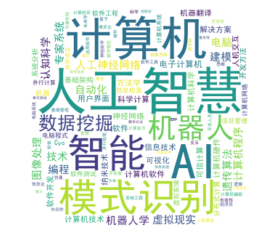

In [151]:
test_word = ['人工智能']
results = model.wv.most_similar(test_word, topn=100)
test_dict = dict()

for i in results:
    test_dict[i[0]] = i[1]
draw_word_cloud(test_dict)

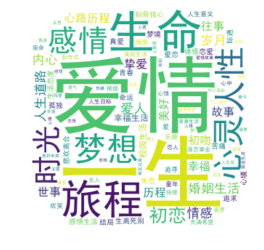

In [152]:
test_word = ['人生']
results = model.wv.most_similar(test_word, topn=100)
test_dict = dict()

for i in results:
    test_dict[i[0]] = i[1]
draw_word_cloud(test_dict)